# 1 - Loading
This notebook contains the development of utility scripts for loading gpx data,tests for those scripts. Data is assumed to be exported from Strava. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gpxpy
import gpxpy.gpx
import gpxcsv
import json
import pprint as pp
%reload_ext
%matplotlib inline

UsageError: Missing module name.


## Statics


In [2]:
pathToData = "C:\\Users\\maziegle\\OneDrive - Capgemini\\Documents\\training\\cycling_exercise\\activities\\"

## Utility Scripts for I/O

In [3]:
## load, and convert GPX to xml, save, return if requested
def gpx_to_xml(input_dir:str, activity_name:str, output_dir:str=None) -> str:

    activity = gpxpy.parse(open(os.path.join(input_dir,activity_name)))
    xml = activity.to_xml()

    if output_dir!=None:
        output_fname = os.path.join(output_dir,os.path.splitext(activity_name)[0]) + '.xml'

        with open(output_fname,'w') as output:
            output.write(xml)
            
        print("Created: " + output_fname)
    return xml

## load, and convert GPX to json, save, return if requested
def gpx_to_json(input_dir:str, activity_name:str, output_dir:str=None) -> str:

    activity = gpxcsv.gpxtolist(os.path.join(input_dir,activity_name))
    
    if output_dir!=None:
        output_fname = os.path.join(output_dir,os.path.splitext(activity_name)[0]) + '.json'
    
        with open(output_fname, 'w') as fn:
            json.dump(activity, fn,ensure_ascii=False, indent=4, sort_keys=True)
    
        print("Created: " + output_fname)

    return activity

## load, and convert GPX to csv, save, return if requested
def gpx_to_csv(input_dir:str, activity_name:str, output_dir:str=None) -> str:

    activity = gpxcsv.gpxtolist(os.path.join(input_dir,activity_name))
    activity = pd.DataFrame(activity)
    
    if output_dir!=None:
        output_fname = os.path.join(output_dir,os.path.splitext(activity_name)[0]) + '.csv'

        activity.to_csv(output_fname)

        print("Created: " + output_fname)

    return activity.to_csv()

## load and parse gpx, return it
def read_gpx(input_dir:str, activity_name:str) -> str:

    activity = gpxpy.parse(open(os.path.join(input_dir,activity_name)))

    return activity

## load and parse gpx, convert to pandas dataframe
def gpx_to_df(input_dir:str, activity_name:str)-> object:

    activity = gpx_to_json(input_dir, activity_name, output_dir=None)
    df = pd.DataFrame(activity)
    
    return df

# find all activities in a folder of certain format, return as dict 
def get_activities(input_path:str, format:str) -> dict:
    
    activities = {"path":[], "name":[], "format":[]}

    dir_list = os.listdir(pathToData)
    for file in dir_list:
        name, ext = os.path.splitext(file)
        if ext == ('.' + format):
            activities["name"].append(name)
            activities["path"].append(input_path)
            activities["format"].append(format)

    return activities

#converts an entire folder of .gpx to selected output format
def batch_convert(input_path:str, output_format:str, output_dir:str) -> None:

    activities_list = get_activities(input_path, format='gpx')
    
    print("Activities List: \n")
    pp.pprint(activities_list)
    print("Begin Batch Convesion")

    for nm, fmt in zip(activities_list["name"], activities_list["format"]):
        
        if output_format == 'xml':
            gpx_to_xml(input_dir=input_path, activity_name=(nm + '.' + fmt), output_dir=output_dir)
        elif output_format == 'json':
            gpx_to_json(input_dir=input_path, activity_name=(nm + '.' + fmt), output_dir=output_dir)
        elif (output_format == 'csv'):
            gpx_to_csv(input_dir=input_path, activity_name=(nm + '.' + fmt), output_dir=output_dir)


In [4]:
activity_xml = gpx_to_xml(input_dir=pathToData ,activity_name="R50_big_foot_hills_.gpx", output_dir=pathToData)
activity_gpxjson = gpx_to_json(input_dir=pathToData, activity_name="R50_big_foot_hills_.gpx", output_dir=pathToData)
activity_gpxcsv =  gpx_to_csv(input_dir=pathToData, activity_name="R50_big_foot_hills_.gpx", output_dir=pathToData)

activity_gpxpy = read_gpx(input_dir=pathToData, activity_name="R50_big_foot_hills_.gpx")
activities_list = get_activities(input_path=pathToData, format='gpx')
batch_convert(pathToData,'json',pathToData)

Created: C:\Users\maziegle\OneDrive - Capgemini\Documents\training\cycling_exercise\activities\R50_big_foot_hills_.xml
Created: C:\Users\maziegle\OneDrive - Capgemini\Documents\training\cycling_exercise\activities\R50_big_foot_hills_.json
Created: C:\Users\maziegle\OneDrive - Capgemini\Documents\training\cycling_exercise\activities\R50_big_foot_hills_.csv
Activities List: 

{'format': ['gpx',
            'gpx',
            'gpx',
            'gpx',
            'gpx',
            'gpx',
            'gpx',
            'gpx',
            'gpx',
            'gpx',
            'gpx'],
 'name': ['R14_Sunday_Century',
          'R16_roxen_clockwise',
          'R17',
          'R20_km_h_C',
          'R23_hard_ride_Hot_and_humid_Plus_fueling_issues_',
          'R24_lake',
          'R50_big_foot_hills_',
          'R63',
          'Ride_20_flat_straight_roads_are_an_illusion_Solo_century',
          'Run_12_sunny_sunday',
          'Run_15_what_proportion_of_calories_burned_was_on_anti_mosqu

In [5]:
df = gpx_to_df(input_dir=pathToData,activity_name="R63.gpx")
df.sample(10)


,lat,lon,power,hr,cad,name,type,ele,time
993,-11.687783,166.917794,216.0,153.0,62.0,R63,17,59.8,2021-10-31T14:31:36Z
3201,-11.683094,166.908910,183.0,158.0,71.0,R63,17,488.0,2021-10-31T15:08:24Z
857,-11.686229,166.919929,242.0,146.0,57.0,R63,17,28.2,2021-10-31T14:29:20Z
2326,-11.684730,166.914006,211.0,156.0,68.0,R63,17,325.8,2021-10-31T14:53:49Z
399,-11.679538,166.936741,186.0,135.0,74.0,R63,17,56.8,2021-10-31T14:21:42Z
2149,-11.683543,166.913534,189.0,161.0,67.0,R63,17,295.0,2021-10-31T14:50:52Z
1173,-11.688685,166.916292,210.0,154.0,65.0,R63,17,98.6,2021-10-31T14:34:36Z
1342,-11.686174,166.918062,213.0,159.0,69.0,R63,17,135.8,2021-10-31T14:37:25Z
2374,-11.685428,166.914446,157.0,154.0,69.0,R63,17,334.0,2021-10-31T14:54:37Z
2705,-11.681849,166.910895,174.0,162.0,71.0,R63,17,396.0,2021-10-31T15:00:08Z


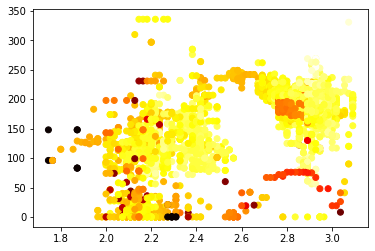

In [6]:

plt.scatter(df.hr/55, df.power, c = df.cad, cmap='hot')

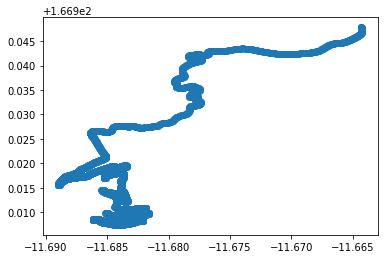

In [7]:
plt.scatter(df.lat, df.lon)

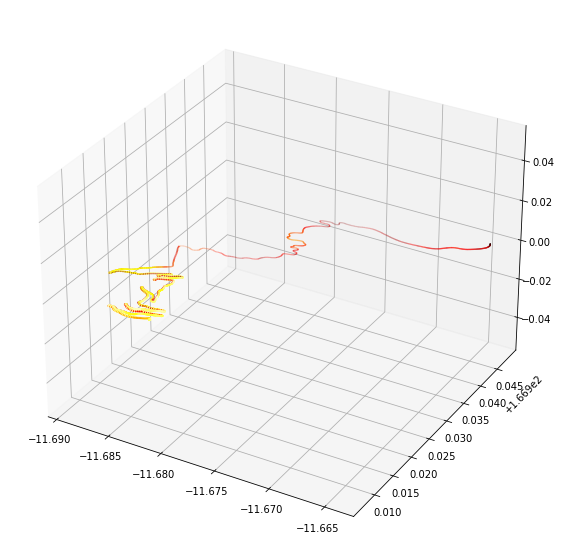

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
plt.scatter(df.lat, df.lon, (df.ele/df.ele.max()), c=df.hr/50, cmap='hot')
plt.show()

In [9]:
lake = pd.read_csv(pathToData+'R24_lake.csv')
lake.head(10)

,Unnamed: 0,lat,lon,hr,cad,name,type,ele,time,atemp
0,0,58.536003,15.038082,103.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T00:59:56Z,NaN
1,1,58.536003,15.038082,103.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T00:59:57Z,NaN
2,2,58.536003,15.038082,104.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T00:59:58Z,13.0
3,3,58.536003,15.038082,105.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T00:59:59Z,13.0
4,4,58.536003,15.038082,105.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T01:00:00Z,13.0
5,5,58.536003,15.038082,103.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T01:00:01Z,13.0
6,6,58.536003,15.038082,103.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T01:00:02Z,13.0
7,7,58.536003,15.038082,103.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T01:00:03Z,13.0
8,8,58.536003,15.038082,103.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T01:00:04Z,13.0
9,9,58.536003,15.038082,104.0,78.0,R24 - Vätternrundan,1,104.9,2018-06-16T01:00:05Z,13.0


In [11]:
lake_json = json.load(open(pathToData+'R17.json'))
lake_json = pd.DataFrame(lake_json)
lake_json.head(10)

,cad,ele,hr,lat,lon,name,power,time,type
0,15.0,1.6,90.0,-11.635495,166.951514,R17,11.0,2022-03-13T15:01:11Z,17
1,16.0,1.6,88.0,-11.635498,166.951514,R17,11.0,2022-03-13T15:01:12Z,17
2,17.0,1.6,88.0,-11.635500,166.951493,R17,11.0,2022-03-13T15:01:13Z,17
3,0.0,1.6,88.0,-11.635503,166.951493,R17,0.0,2022-03-13T15:01:14Z,17
4,0.0,1.6,88.0,-11.635505,166.951493,R17,0.0,2022-03-13T15:01:15Z,17
5,10.0,1.6,88.0,-11.635505,166.951493,R17,0.0,2022-03-13T15:01:16Z,17
6,10.0,1.6,89.0,-11.635505,166.951493,R17,0.0,2022-03-13T15:01:17Z,17
7,10.0,1.6,89.0,-11.635505,166.951493,R17,0.0,2022-03-13T15:01:18Z,17
8,0.0,1.6,90.0,-11.635505,166.951493,R17,0.0,2022-03-13T15:01:19Z,17
9,0.0,1.6,90.0,-11.635505,166.951493,R17,0.0,2022-03-13T15:01:20Z,17


In [12]:
lake_xml = pd.read_xml()
lake_xml.head()

,time,name,type,trkseg
0,2022-03-13T15:01:11Z,None,NaN,NaN
1,None,R17,17.0,NaN
